In [8]:
# 自作モジュールへの変更を自動的にリロードするためのおまじない
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import lib.S2Z as stoz
import lib.Z_model as model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


logをとってしまった状態でフィッティングしたほうが良いと寺山さんがおっしゃっていました

[ 4.10166572e-06  1.69123521e-10 -5.75490682e+00  3.58640433e-11
  4.95071809e+00]
[1.24546529e-09 5.19552701e-14 2.95233329e-02 1.09496493e-14
 1.71043547e-02]


/tmp/ipykernel_54176/97724063.py:11: RuntimeWarning: invalid value encountered in sqrt
  print(np.diag(np.sqrt(pcov)))


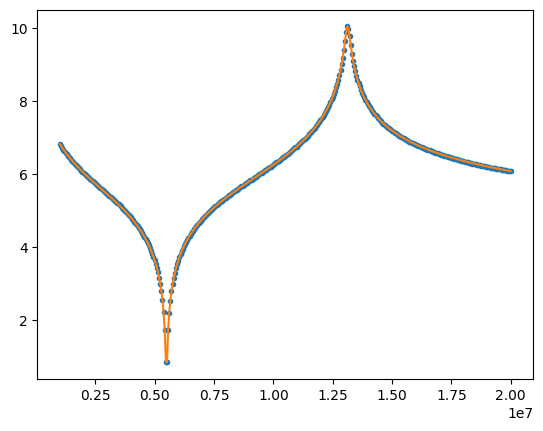

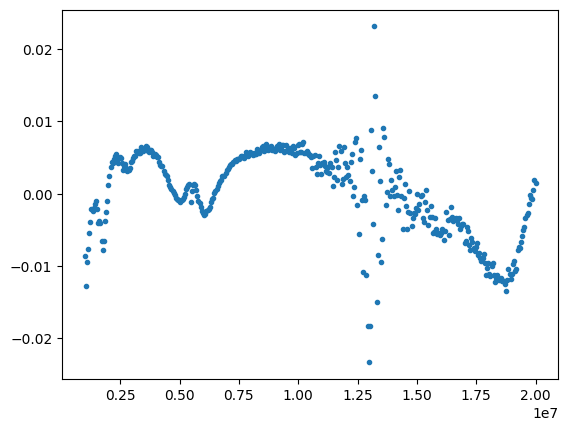

In [9]:
data = np.loadtxt("../data/coil+dee(serial)_1-20MHz_2026_02_04.s1p",delimiter=' ')
freq,Z_tot = stoz.direct(data)

Z_abs_log = np.log(np.abs(Z_tot))

popt,pcov = curve_fit(model.RLC_ser_stray_abs_log,freq,Z_abs_log,p0=(6e-6,30e-12,10,30e-12,10))
plt.plot(freq,Z_abs_log,'.',label='data')
plt.plot(freq,model.RLC_ser_stray_abs_log(freq,*popt),label='fit')
plt.figure()
print(popt)
print(np.diag(np.sqrt(pcov)))

plt.plot(freq, Z_abs_log - model.RLC_ser_stray_abs_log(freq,*popt), '.', label = 'zansa')

この計算についてはノートを参照してください。

Text(0.5, 1.0, 'Abs of Sum of Impedance (Z_L + Z_c), semilog')

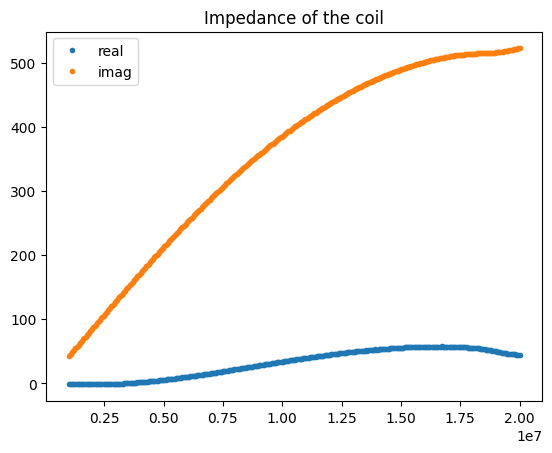

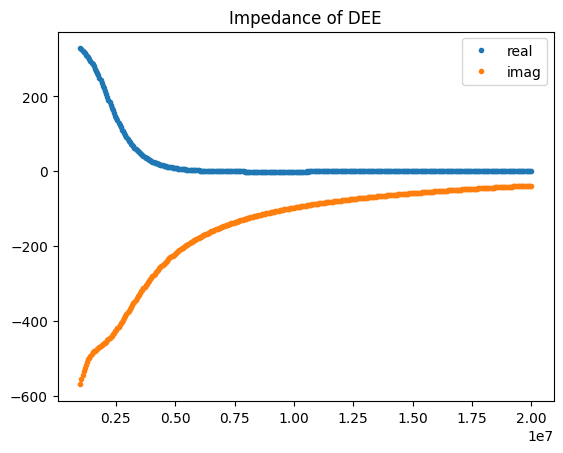

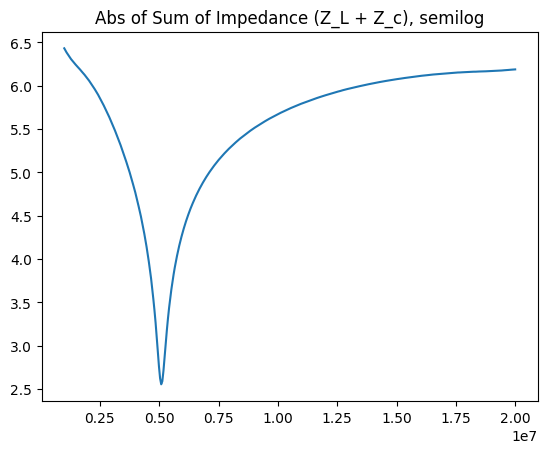

In [10]:
data = np.loadtxt("../data/coil+dee(serial)_dee_to_port1.s2p",delimiter=' ')
freq,Z_L,Z_C = stoz.bridge_at_port1(data)

plt.plot(freq,Z_L.real,'.',label='real')
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.legend()
plt.title('Impedance of the coil')
plt.figure()
plt.plot(freq,Z_C.real,'.',label='real')
plt.plot(freq,Z_C.imag,'.',label='imag')
plt.title('Impedance of DEE')
plt.legend()
plt.figure()

Z_tot_port1 = Z_L + Z_C
plt.plot(freq, np.log(np.abs(Z_tot_port1)))
plt.title('Abs of Sum of Impedance (Z_L + Z_c), semilog')

入力電圧に対するDEEの電圧の比は以下のようにかけるはず

freq peak 1 =  5.5125 MHz
freq peak 2 =  5.085 MHz


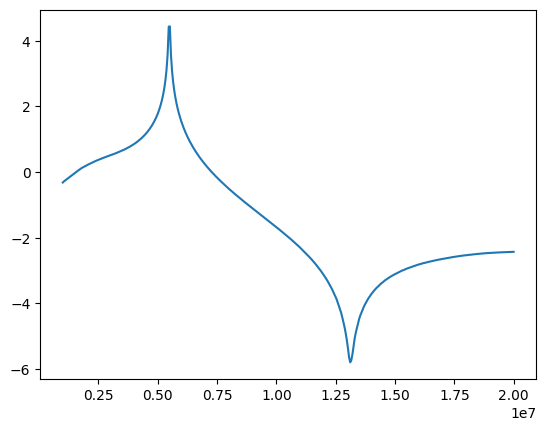

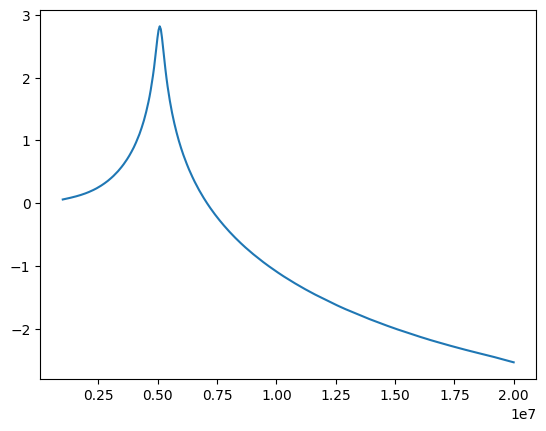

In [29]:
freq_peak_1 = freq[np.argmax(np.abs(Z_C)/np.abs(Z_tot))]
freq_peak_2 = freq[np.argmax(np.abs(Z_C)/np.abs(Z_tot_port1))]
print("freq peak 1 = ", freq_peak_1 * 10 ** (-6), "MHz")
print("freq peak 2 = ", freq_peak_2 * 10 ** (-6), "MHz")



plt.plot(freq,np.log(np.abs(Z_C)/np.abs(Z_tot)))
plt.figure()
#Ztotのほうをport1のデータを使って表示すると以下のようになる
plt.plot(freq,np.log(np.abs(Z_C)/np.abs(Z_tot_port1)))




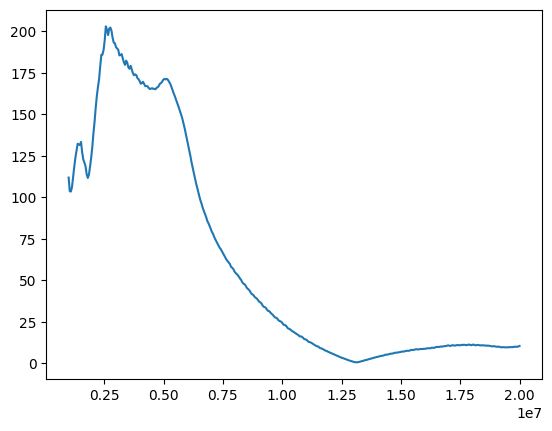

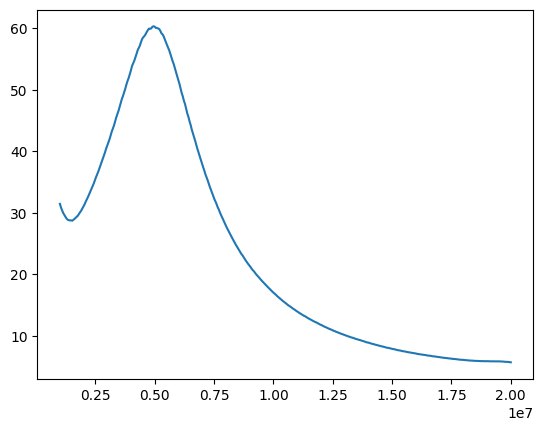

In [30]:
plt.plot(freq,np.abs(Z_C.imag)/np.sqrt(Z_tot.real))
plt.figure()
plt.plot(freq,np.abs(Z_C.imag)/np.sqrt(Z_tot_port1.real))


port2でも同じことをやる

Text(0.5, 1.0, 'Abs of Sum of Impedance (Z_L + Z_c), semilog')

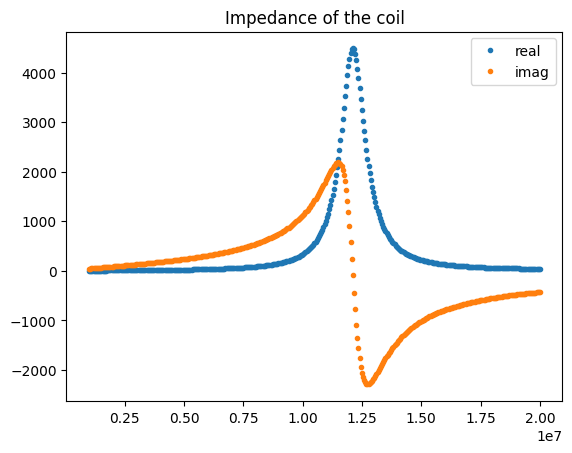

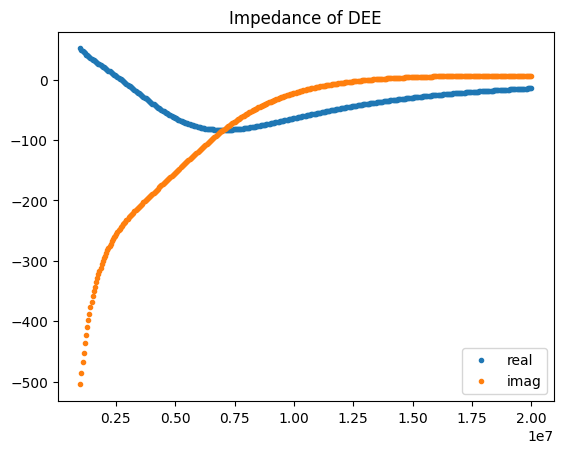

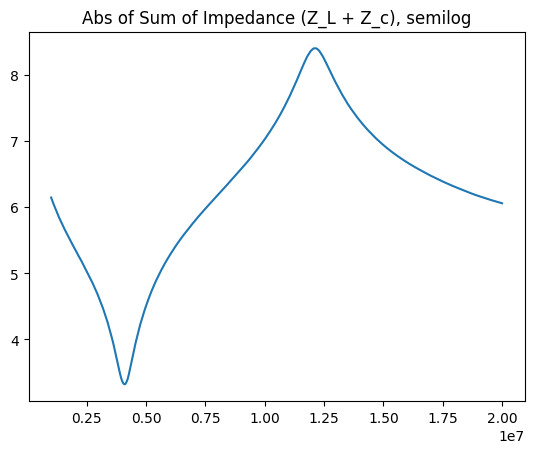

In [11]:
data = np.loadtxt("../data/coil+dee(serial)_dee_to_port2.s2p",delimiter=' ')
freq,Z_L,Z_C = stoz.bridge_at_port2(data)

plt.plot(freq,Z_L.real,'.',label='real')
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.legend()
plt.title('Impedance of the coil')
plt.figure()
plt.plot(freq,Z_C.real,'.',label='real')
plt.plot(freq,Z_C.imag,'.',label='imag')
plt.title('Impedance of DEE')
plt.legend()
plt.figure()

Z_tot_port2 = Z_L + Z_C
plt.plot(freq, np.log(np.abs(Z_tot_port2)))
plt.title('Abs of Sum of Impedance (Z_L + Z_c), semilog')

入力電圧に対するDeeの電圧

freq peak 2 =  4.0874999999999995 MHz


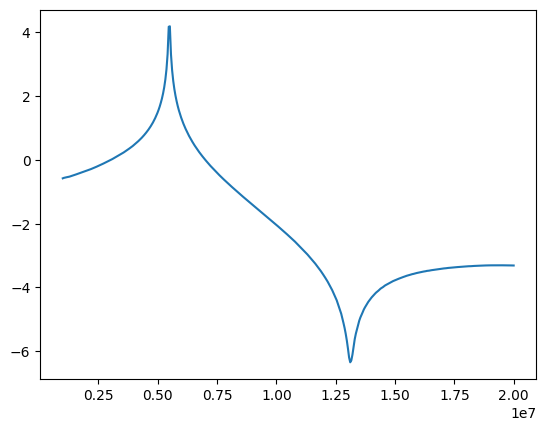

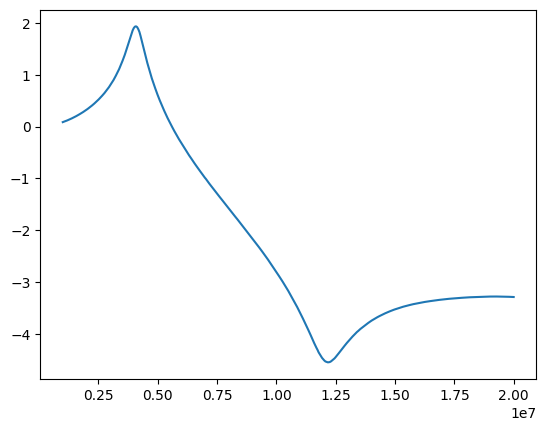

In [32]:
freq_peak_2 = freq[np.argmax(np.abs(Z_C)/np.abs(Z_tot_port2))]
print("freq peak 2 = ", freq_peak_2 * 10 ** (-6), "MHz")



plt.plot(freq,np.log(np.abs(Z_C)/np.abs(Z_tot)))
plt.figure()
#Ztotのほうをport2のデータを使って表示すると以下のようになる
plt.plot(freq,np.log(np.abs(Z_C)/np.abs(Z_tot_port2)))

入力電力に対する入力電圧

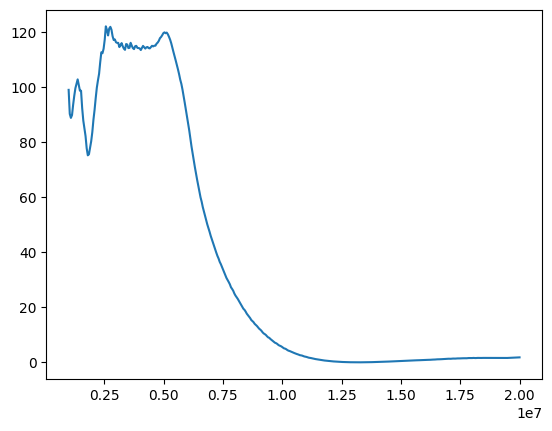

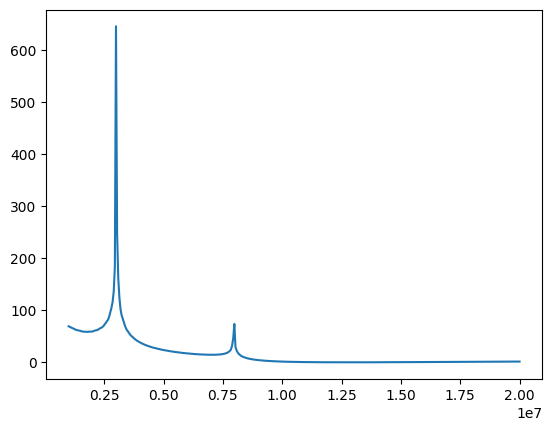

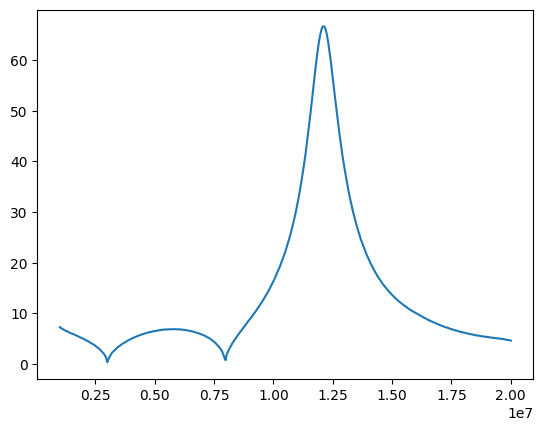

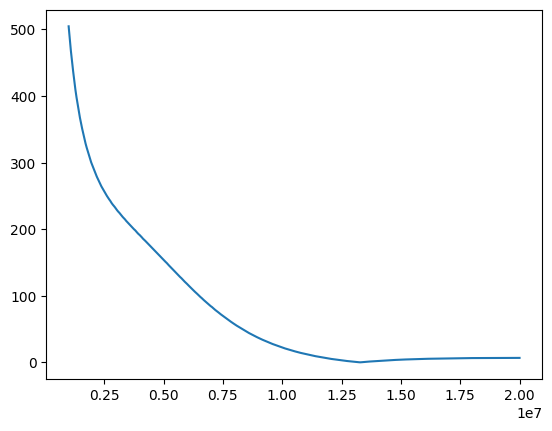

In [33]:
plt.plot(freq,np.abs(Z_C.imag)/np.sqrt(np.abs(Z_tot.real)))
plt.figure()
plt.plot(freq,np.abs(Z_C.imag)/np.sqrt(np.abs(Z_tot_port2.real)))
plt.figure()
plt.plot(freq, np.sqrt(np.abs(Z_tot_port2.real)))
#途中で負になる, 実インピーダンスが変？
plt.figure()
plt.plot(freq, np.abs(Z_C.imag))


Text(0.5, 1.0, 'Abs of Sum of Impedance (Z_L + Z_c), semilog')

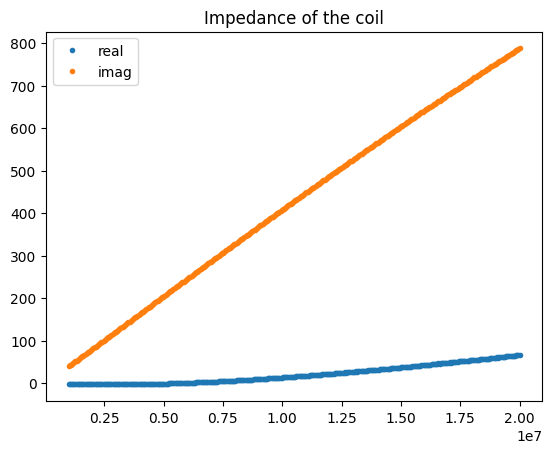

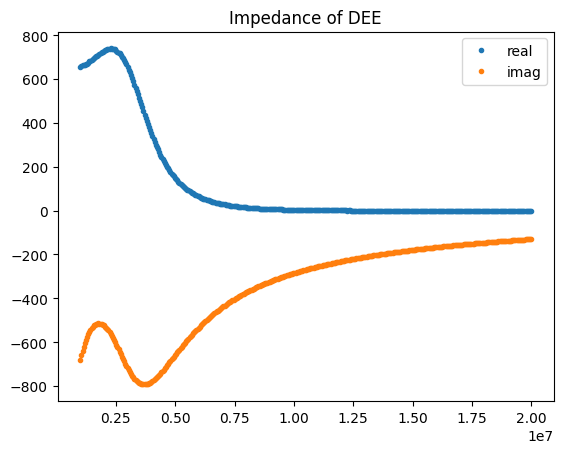

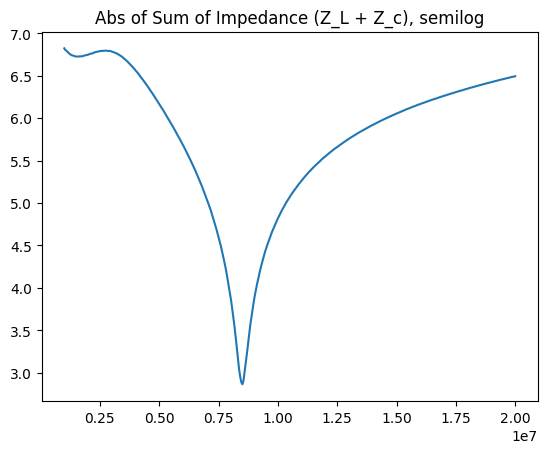

In [12]:
data = np.loadtxt("../data/coil+dee(serial)_1_20_02_13_dee_to_port1.s2p",delimiter=' ')
freq,Z_L,Z_C = stoz.bridge_at_port1(data)

plt.plot(freq,Z_L.real,'.',label='real')
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.legend()
plt.title('Impedance of the coil')
plt.figure()
plt.plot(freq,Z_C.real,'.',label='real')
plt.plot(freq,Z_C.imag,'.',label='imag')
plt.title('Impedance of DEE')
plt.legend()
plt.figure()

Z_tot_port1 = Z_L + Z_C
plt.plot(freq, np.log(np.abs(Z_tot_port1)))
plt.title('Abs of Sum of Impedance (Z_L + Z_c), semilog')

Text(0.5, 1.0, 'Abs of Sum of Impedance (Z_L + Z_c), semilog')

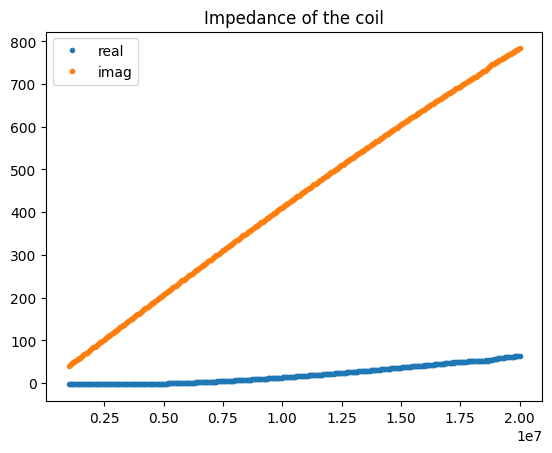

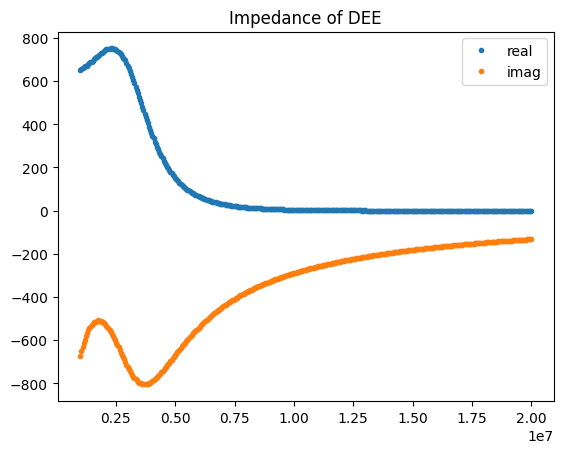

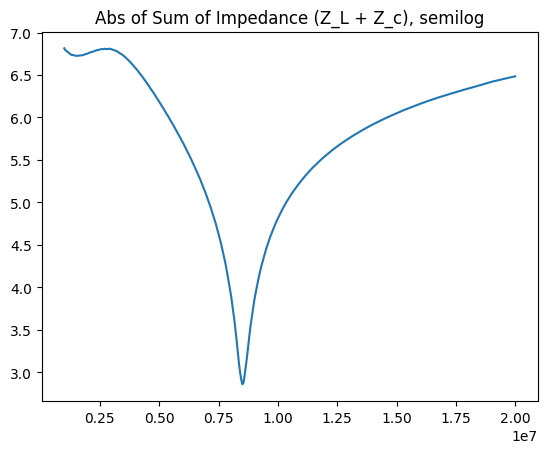

In [13]:
data = np.loadtxt("../data/coil+dee(serial)_1_20_02_13_dee_to_port1(2).s2p",delimiter=' ')
freq,Z_L,Z_C = stoz.bridge_at_port1(data)

plt.plot(freq,Z_L.real,'.',label='real')
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.legend()
plt.title('Impedance of the coil')
plt.figure()
plt.plot(freq,Z_C.real,'.',label='real')
plt.plot(freq,Z_C.imag,'.',label='imag')
plt.title('Impedance of DEE')
plt.legend()
plt.figure()

Z_tot_port1 = Z_L + Z_C
plt.plot(freq, np.log(np.abs(Z_tot_port1)))
plt.title('Abs of Sum of Impedance (Z_L + Z_c), semilog')

6.26832735380714e-06


Text(0.5, 1.0, 'Impedance of the coil')

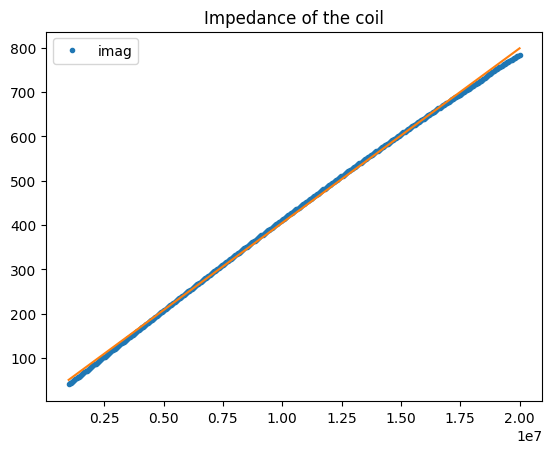

In [36]:
def linear(x,a,b):
    return a*x + b

popt,pcov = curve_fit(linear,freq,Z_L.imag)
print(popt[0]/(2 * np.pi))
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.plot(freq,linear(freq,*popt))
plt.legend()
plt.title('Impedance of the coil')

Text(0.5, 1.0, 'Abs of Sum of Impedance (Z_L + Z_c), semilog')

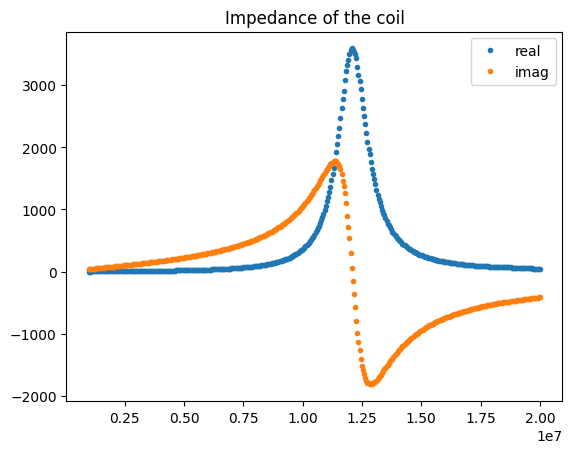

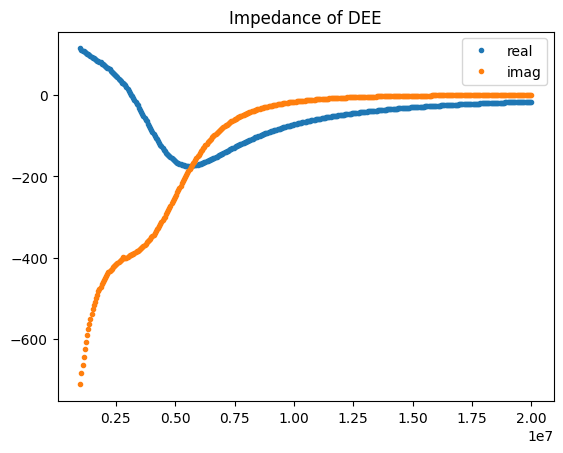

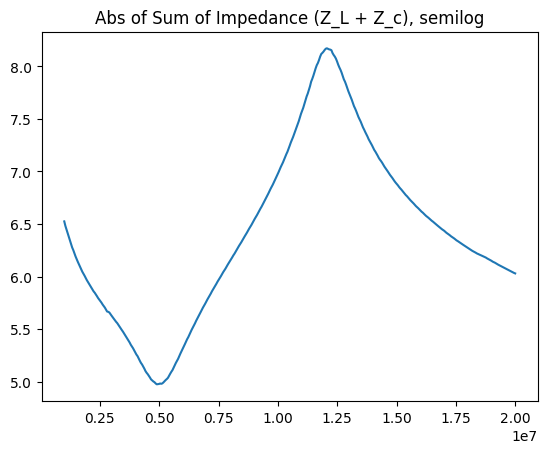

In [15]:
data = np.loadtxt("../data/coil+dee(serial)_dee_to_port2_1-20MHz_2026_02_13.s2p",delimiter=' ')
freq,Z_L,Z_C = stoz.bridge_at_port2(data)

plt.plot(freq,Z_L.real,'.',label='real')
plt.plot(freq,Z_L.imag,'.',label='imag')
plt.legend()
plt.title('Impedance of the coil')
plt.figure()
plt.plot(freq,Z_C.real,'.',label='real')
plt.plot(freq,Z_C.imag,'.',label='imag')
plt.title('Impedance of DEE')
plt.legend()
plt.figure()

Z_tot_port2 = Z_L + Z_C
plt.plot(freq, np.log(np.abs(Z_tot_port2)))
plt.title('Abs of Sum of Impedance (Z_L + Z_c), semilog')

[5.66099720e-06 3.01887980e-11 5.22615026e+01]


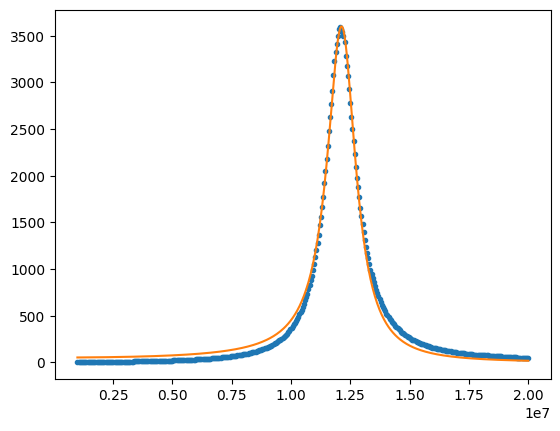

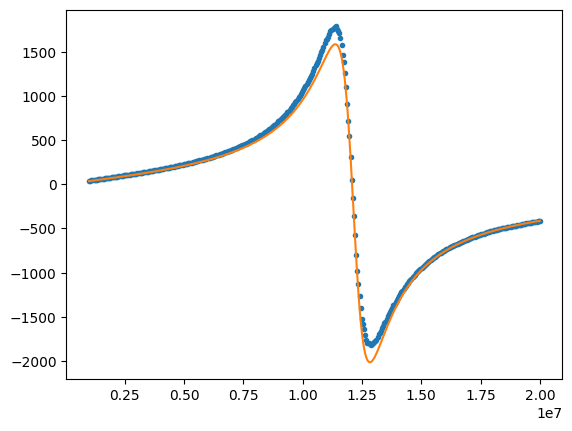

In [38]:
import lib.Z_model as model

popt,pcov = curve_fit(model.L_stray_real,freq,Z_L.real,p0=(6.16930586e-06,2.80023503e-11,8.83566071e+01))
plt.plot(freq,Z_L.real,'.')
plt.plot(freq,model.L_stray_real(freq,*popt))
print(popt)

plt.figure()
popt,pcov = curve_fit(model.L_stray_imag,freq,Z_L.imag,p0=(5.66099720e-06,3.01887980e-11,5.22615026e+01))
plt.plot(freq,Z_L.imag,'.')
plt.plot(freq,model.L_stray_imag(freq,*popt))